C:\Users\jaint\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaint\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaint\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaint\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

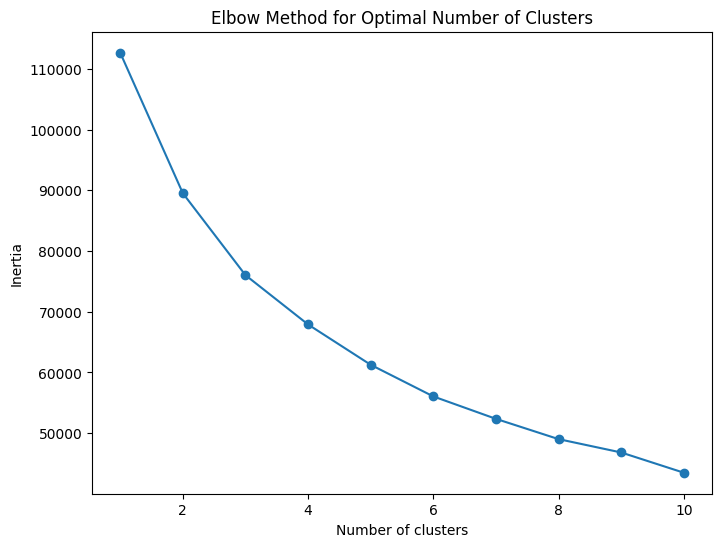

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://drive.google.com/uc?id=1qBkAiPPQ9bTiaY6PcDq7Tmp8DQsCyyrZ'
df = pd.read_csv(url)

# Convert categorical variables to numeric
df_encoded = pd.get_dummies(df)

target_column = 'Churn_No'
# Separate features and target variable
X = df_encoded.drop([target_column, 'Churn_Yes'], axis=1)  # Drop the target variables

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')

# Save the Elbow plot
plt.savefig('elbow_method_plot.png')

plt.show()


In [5]:
from fpdf import FPDF
# Create Scaling Techniques Documentation PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Scaling Techniques Documentation", ln=True, align='C')
pdf.ln(10)
pdf.set_font("Arial", size=12)
scaling_techniques_text = """
In this project, we applied feature scaling to the numerical features using the StandardScaler from Scikit-learn. 
This technique standardizes the features by removing the mean and scaling to unit variance.

Feature scaling is essential in the preprocessing pipeline to ensure that all features contribute equally to the model's learning process. 
Without scaling, features with larger ranges can disproportionately influence the model.

The StandardScaler transforms each feature by subtracting the mean and scaling to unit variance. 
The formula used for scaling is:

    X_scaled = (X - mean) / standard_deviation

where:
- X is the original feature value
- mean is the average of the feature values
- standard_deviation is the standard deviation of the feature values

Below is the code snippet used for scaling the features:

```python
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Separate features and target variable
target_column = 'Churn_No'  # Use 'Churn_No' as the target variable



# Separate features and target variable
X = df_encoded.drop([target_column, 'Churn_Yes'], axis=1)  # Drop the target variables

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


"""

pdf.multi_cell(0, 10, scaling_techniques_text)
pdf_output_path = "scaling_techniques_documentation.pdf"
pdf.output(pdf_output_path)

print(f"Scaling techniques documentation saved as {pdf_output_path}")

Scaling techniques documentation saved as scaling_techniques_documentation.pdf
